In [56]:
# Importação da biblioteca pandas, usada para manipulação e análise de dados em formato de tabelas (DataFrames).
import pandas as pd  
# Importação da biblioteca yfinance, utilizada para baixar dados financeiros históricos.
import yfinance as yf  
# Importação da classe 'date' do módulo datetime, usada para trabalhar com datas no formato 'YYYY-MM-DD'.
from datetime import date 
# Importa a biblioteca matplotlib para criar gráficos. 'pyplot' é usada para criar gráficos de forma simples.
import matplotlib.pyplot as plt  


In [57]:
"""
Este bloco lê os dados de uma carteira de ações de um arquivo de texto, 
ajusta os tickers (adicionando '.SA') e converte os valores investidos para número. 
Os dados são armazenados em um dicionário chamado 'carteira' e impressos ao final.
"""

with open("carteira.txt", "r") as arquivo:
    texto = arquivo.readlines()

carteira = {}

for linha in texto:
    ticker, valor = linha.split("-")
    ticker = f"{ticker.strip()}.SA"
    valor = float(valor.strip())
    print(ticker, valor)
    carteira[ticker] = valor
print(carteira)

ITUB4.SA 1000.0
BBAS3.SA 2000.0
VALE3.SA 1000.0
EGIE3.SA 500.0
SLCE3.SA 300.0
{'ITUB4.SA': 1000.0, 'BBAS3.SA': 2000.0, 'VALE3.SA': 1000.0, 'EGIE3.SA': 500.0, 'SLCE3.SA': 300.0}


In [58]:
"""
Define uma função que obtém as cotações de fechamento ajustadas dos ativos, 
usando 'yfinance', e retorna os dados para os tickers no intervalo de datas especificado.
O código então obtém as cotações dos ativos da carteira e do índice Bovespa e as exibe.
"""

def obter_cotacoes(tickers, inicio, final):
    dados = yf.download(tickers, start=inicio, end=final)
    return dados['Close']

acao = list(carteira.keys()) + ["^BVSP"]

data_inicio = "2024-01-01"
data_final = date.today().strftime('%Y-%m-%d')

tabela_cotacoes = obter_cotacoes(acao, data_inicio, data_final)
display(tabela_cotacoes)

[*********************100%***********************]  6 of 6 completed


Ticker,BBAS3.SA,EGIE3.SA,ITUB4.SA,SLCE3.SA,VALE3.SA,^BVSP
Date,,,,,,
2024-01-02,25.262661,41.862671,31.221710,17.552208,70.522316,132697.0
2024-01-03,25.285728,41.843868,30.877079,17.676556,70.156204,132834.0
2024-01-04,25.018154,41.721626,30.672163,17.456556,69.213470,131226.0
2024-01-05,25.318022,41.655800,31.389368,17.714817,68.325645,132023.0
2024-01-08,25.534845,41.354904,31.054049,17.561773,67.977829,132427.0
...,...,...,...,...,...,...
2025-01-29,27.440001,36.720001,33.202660,17.520000,52.799999,123432.0
2025-01-30,27.639999,36.849998,34.012234,17.889999,55.029999,126913.0
2025-01-31,27.680000,36.799999,33.792351,17.360001,54.169998,126135.0


In [59]:
"""
Este bloco calcula a rentabilidade de cada ativo, dividindo o preço de fechamento final pelo inicial 
e armazena os resultados no dicionário 'rentabilidades', que é impresso ao final.
"""

rentabilidades = {}
for ativo in tabela_cotacoes.columns:
    rentabilidade = tabela_cotacoes[ativo][-1] / tabela_cotacoes[ativo][0]
    rentabilidades[ativo] = rentabilidade
print(rentabilidades)

{'BBAS3.SA': 1.0992508065362467, 'EGIE3.SA': 0.862343412385293, 'ITUB4.SA': 1.076174183073935, 'SLCE3.SA': 1.004431990221694, 'VALE3.SA': 0.7659986730136125, '^BVSP': 0.9431034612689059}


C:\Users\Mariane Souza\AppData\Local\Temp\ipykernel_13128\3752879855.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rentabilidade = tabela_cotacoes[ativo][-1] / tabela_cotacoes[ativo][0]


In [60]:
"""
Este bloco calcula a rentabilidade da carteira de ações e do índice Bovespa, comparando o desempenho da carteira com o mercado. 
Ele calcula o valor inicial da carteira, o valor final com base nas rentabilidades dos ativos, e a variação percentual para determinar 
a rentabilidade líquida. Também calcula a rentabilidade do índice Bovespa para comparação.
"""

valor_inicial = sum(carteira.values())
print(valor_inicial)

valor_final = sum(carteira[ativo] * rentabilidades[ativo] for ativo in carteira)
print(valor_final)
rentabilidade_carteira = valor_final / valor_inicial - 1
print(f"{rentabilidade_carteira:.1%}")
rentabilidade_indice = rentabilidades["^BVSP"] - 1
print(f"{rentabilidade_indice:.1%}")

4800.0
4773.175772419197
-0.6%
-5.7%


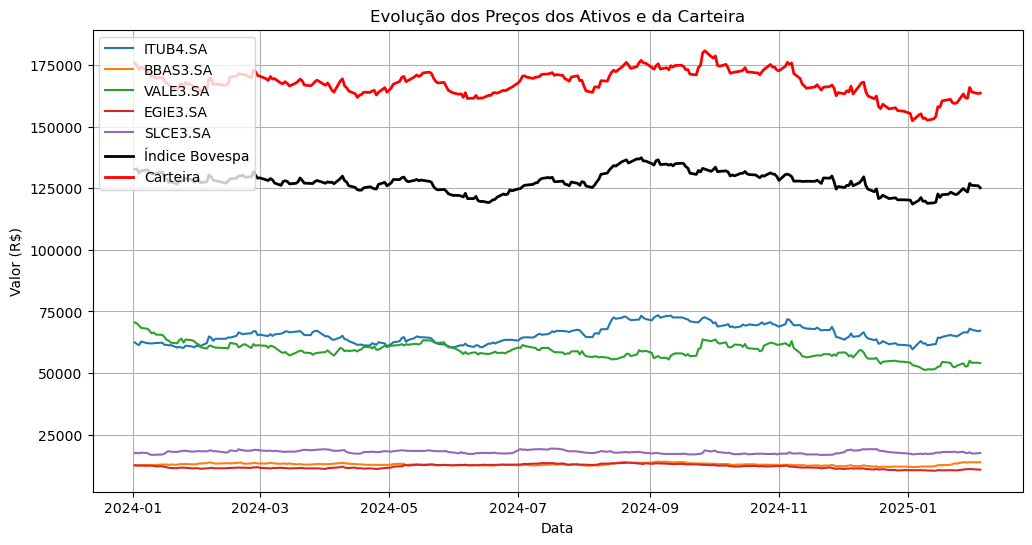

In [61]:
# Calculando o valor de cada ativo ao longo do tempo

# Seleciona as colunas de 'tabela_cotacoes' que correspondem aos ativos presentes na carteira
# Multiplica os preços de fechamento de cada ativo pelo valor de cada ação no portfólio
valores_ativos = tabela_cotacoes[carteira.keys()] * [carteira[ativo] for ativo in tabela_cotacoes.columns if ativo in carteira]

# Calcula o valor da carteira ao longo do tempo (soma dos valores de cada ativo)
# Soma os valores de todos os ativos (colunas) em cada linha (data) para calcular o valor total da carteira em cada data
valor_carteira = valores_ativos.sum(axis=1)

# Inicializa o gráfico com um tamanho de 12x6 polegadas
plt.figure(figsize=(12,6))

# Plota a evolução dos preços dos ativos na carteira
# Para cada ativo na carteira, sua evolução é apresentada no gráfico
for ativo in carteira.keys():
    plt.plot(tabela_cotacoes.index, valores_ativos[ativo], label=ativo)

# Plota a evolução do valor do Índice Bovespa no gráfico
# Adiciona uma linha para o índice Bovespa
plt.plot(tabela_cotacoes.index, tabela_cotacoes['^BVSP'], label='Índice Bovespa', color='black', linewidth=2)

# Plota a evolução do valor da carteira ao longo do tempo
# Plota a linha vermelha para o valor total da carteira
plt.plot(valor_carteira.index, valor_carteira, label='Carteira', color='red', linewidth=2)

# Adiciona título ao gráfico
plt.title("Evolução dos Preços dos Ativos e da Carteira")
# Adiciona rótulo ao eixo X (datas)
plt.xlabel("Data")
# Adiciona rótulo ao eixo Y (valores dos ativos/carteira)
plt.ylabel("Valor (R$)")
# Adiciona uma legenda ao gráfico no canto superior esquerdo
plt.legend(loc='upper left')
# Ativa a grade no gráfico para facilitar a leitura
plt.grid(True)
# Exibe o gráfico
plt.show()
